### Imports

In [1]:
import numpy as np
from color_pipeline_functions import *
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style = "white")

jzazbz_array = np.load('../comp-syn2/notebooks/jzazbz_array.npy')

### Calculate color coherence statistics

In [2]:
directory = {'JzAzBz_wavelet': 'JzAzBz_clustering/', 'Grayscaled_wavelet': 'grayscaled/',
              'CNN':'NN_cluster/', 'Style': 'style_cluster/', 'Transformer': 'style_transformer_cluster/'}

image_directory = {}
image_data = {}
coherence = {}
coherence_all = {}
rgb_list = {}
hulls = {}
f = {}

for key in directory.keys():
    image_directory[key] = initialize_image_directory(directory[key])
    image_data[key] = get_image_data(image_directory[key], directory[key], jzazbz_array)
    coherence[key], coherence_all[key] = measure_color_coherence(image_data[key], image_directory[key])
    rgb_list[key] = get_rgb_list(image_data[key])
    hulls[key] = get_convex_hulls(image_data[key], image_directory[key])
    f[key] = color_coherence_fraction(image_data[key], hulls[key])

In [11]:
print(f)

{'JzAzBz_wavelet': 0.9185606060606061, 'Grayscaled_wavelet': 0.48674242424242425, 'CNN': 0.10285714285714286, 'Style': 0.48484848484848486, 'Transformer': 0.08857142857142856}


### Plots

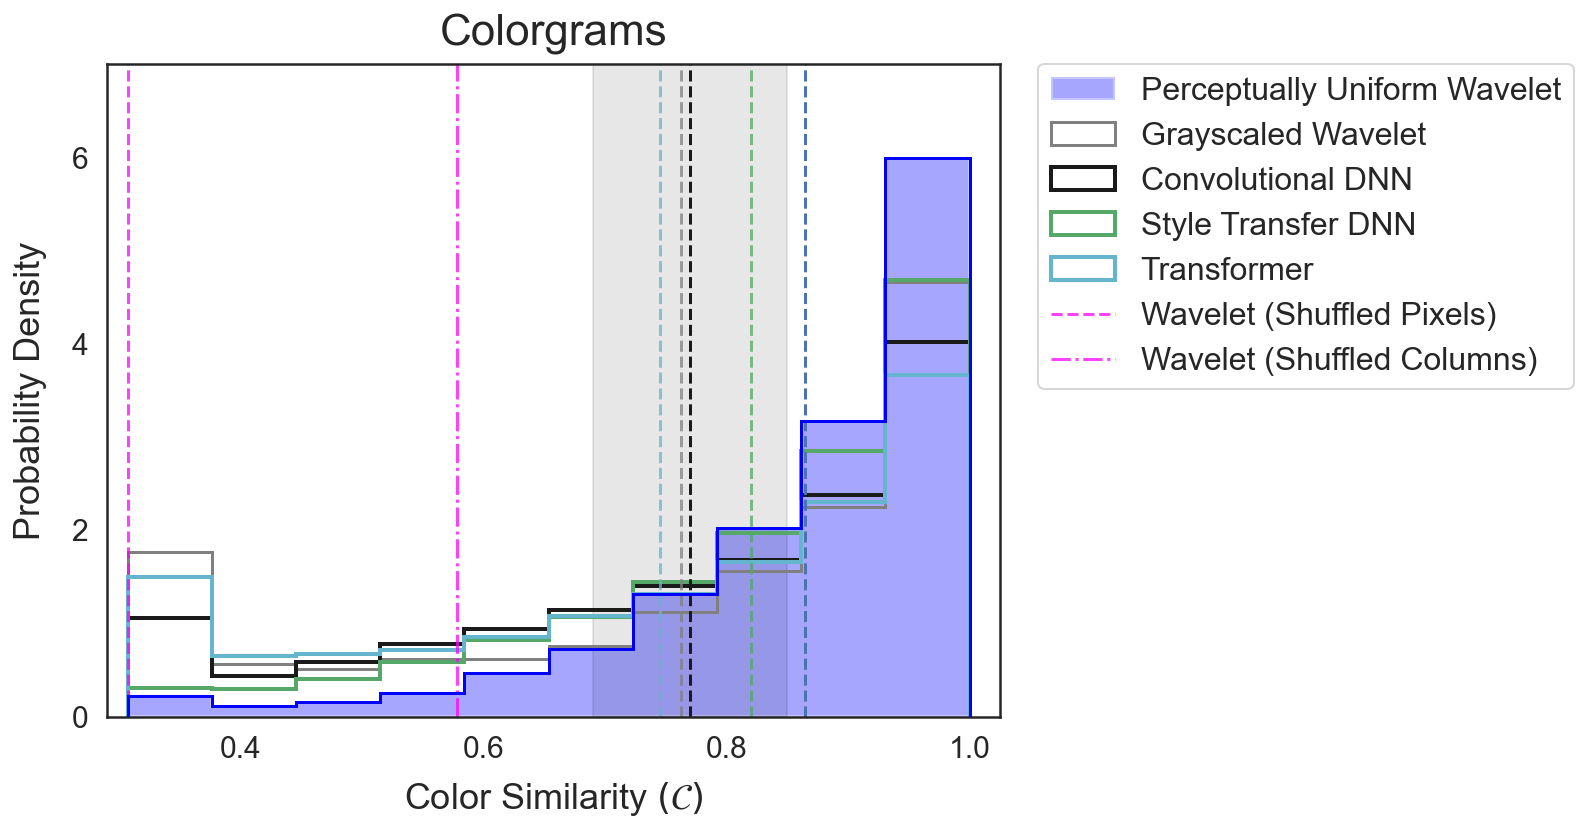

In [4]:
plt.figure(figsize=(8,6))

###
plt.hist(1.-np.array(coherence_all['JzAzBz_wavelet']),lw=2,histtype='stepfilled',color='blue',alpha=0.35,
         label='Perceptually Uniform Wavelet',density=True)
plt.hist(1.-np.array(coherence_all['JzAzBz_wavelet']),lw=1.5,histtype='step',color='blue',alpha=1.0,density=True,
         zorder=999)

plt.hist(1.-np.array(coherence_all['Grayscaled_wavelet']),color='gray',lw=1.5,histtype='step',
         label='Grayscaled Wavelet',density=True)
plt.hist(1.-np.array(coherence_all['CNN']),histtype='step',color='k',lw=2,label='Convolutional DNN',density=True)
plt.hist(1.-np.array(coherence_all['Style']),histtype='step',color='g',lw=2,label='Style Transfer DNN',density=True)

plt.hist(1.-np.array(coherence_all['Transformer']),histtype='step',color='c',lw=2,label='Transformer',density=True)
###

###
plt.plot(np.ones(10)*np.mean(1.-np.array(coherence_all['JzAzBz_wavelet'])),np.linspace(0,7,10),'b--',alpha=1.0)
plt.plot(np.ones(10)*np.mean(1.-np.array(coherence_all['CNN'])),np.linspace(0,7,10),'k--',alpha=1.0)
plt.plot(np.ones(10)*np.mean(1.-np.array(coherence_all['Grayscaled_wavelet'])),np.linspace(0,7,10),c='gray',ls='--',
         alpha=0.75)
plt.plot(np.ones(10)*np.mean(1.-np.array(coherence_all['Style'])),np.linspace(0,7,10),c='g',ls='--',alpha=0.75)
plt.plot(np.ones(10)*np.mean(1.-np.array(coherence_all['Transformer'])),np.linspace(0,7,10),c='c',ls='--',alpha=0.75)

plt.plot(np.ones(10)*0.3068528194400544,np.linspace(0,7,10),c='magenta',ls='--',alpha=0.75,
         label='Wavelet (Shuffled Pixels)')
plt.plot(np.ones(10)*0.578,np.linspace(0,7,10),c='magenta',ls='-.',alpha=0.75,label='Wavelet (Shuffled Columns)')
###

plt.axvspan(np.mean(1.-np.array(coherence_all['CNN']))-0.08, 
            np.mean(1.-np.array(coherence_all['CNN']))+0.08, alpha=0.1, color='k')

plt.xlim(0.29,1.025)
plt.ylim(0,7)

plt.xticks([0.4,0.6,0.8,1.0],fontsize=15)
plt.yticks([0,2,4,6],fontsize=15)

plt.legend(loc=2,fontsize=16,bbox_to_anchor=(1.025,1.025),frameon=True)
plt.xlabel(r'Color Similarity $(\mathcal{C})$',fontsize=18,labelpad=8)
plt.ylabel('Probability Density',fontsize=18,labelpad=12)

plt.title('Colorgrams',fontsize=22,y=1.01)
plt.show()

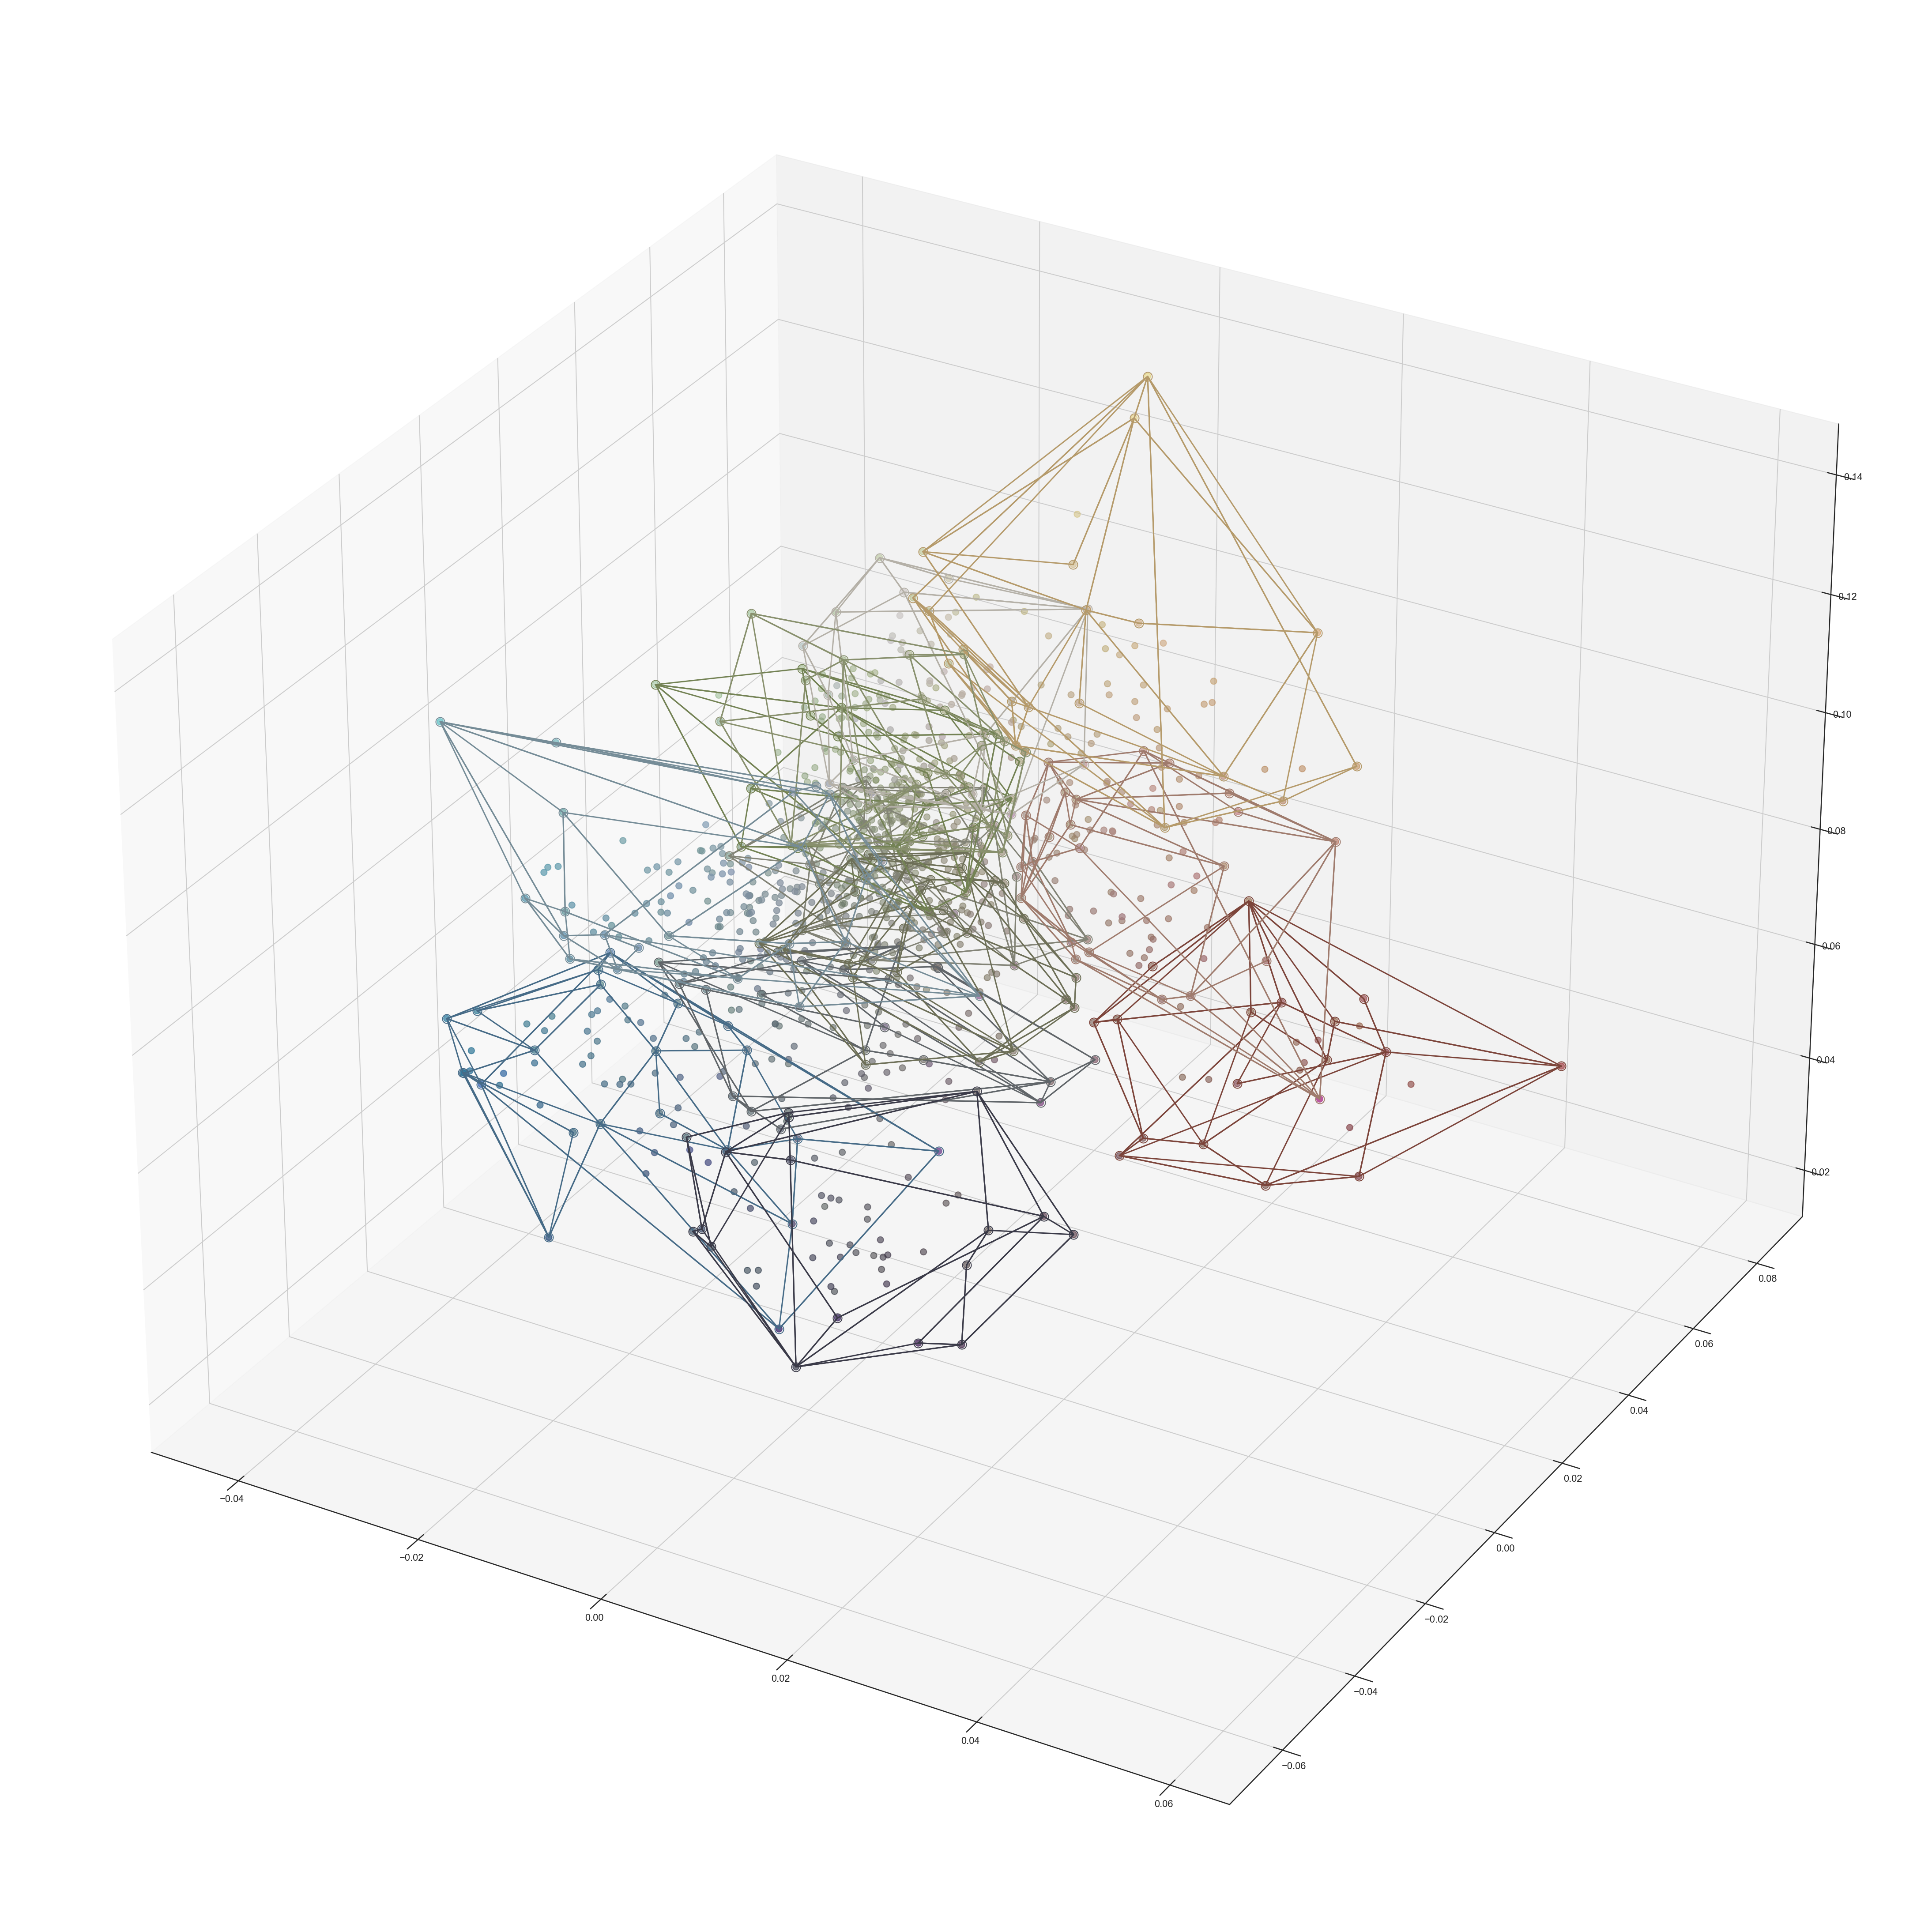

In [9]:
fig = plt.figure(figsize=(40,40))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(list(image_data['JzAzBz_wavelet']['az_stripe_means'].values()),
           list(image_data['JzAzBz_wavelet']['bz_stripe_means'].values()),
           list(image_data['JzAzBz_wavelet']['jz_stripe_means'].values()), 
                c=np.array(rgb_list['JzAzBz_wavelet'])/255.,s=50)

for key in image_directory['JzAzBz_wavelet'].keys():
    rgb_vals = []
    rgb_vals_c = []
    for img in image_directory['JzAzBz_wavelet'][key]:
        rgb_vals.append(np.array([image_data['JzAzBz_wavelet']['az_stripe_means'][img],
                                  image_data['JzAzBz_wavelet']['bz_stripe_means'][img],
                                  image_data['JzAzBz_wavelet']['jz_stripe_means'][img]]))
        rgb_vals_c.append(np.array([image_data['JzAzBz_wavelet']['r_stripe_means'][img],
                                    image_data['JzAzBz_wavelet']['g_stripe_means'][img],
                                    image_data['JzAzBz_wavelet']['b_stripe_means'][img]]))
    try:
        hull = ConvexHull(rgb_vals)
        for simplex in hull.simplices:
                ax.plot(np.array(rgb_vals)[:,0][simplex], np.array(rgb_vals)[:,1][simplex], 
                        np.array(rgb_vals)[:,2][simplex], 
                        c=np.mean(np.array(rgb_vals_c),axis=0)/255.)
        ax.plot(np.array(rgb_vals)[:,0][hull.vertices], np.array(rgb_vals)[:,1][hull.vertices], 
                np.array(rgb_vals)[:,2][hull.vertices],
                'o', mec=np.mean(np.array(rgb_vals_c),axis=0)/255., color='none', lw=1, markersize=10)
    except:
        continue
    
plt.show()

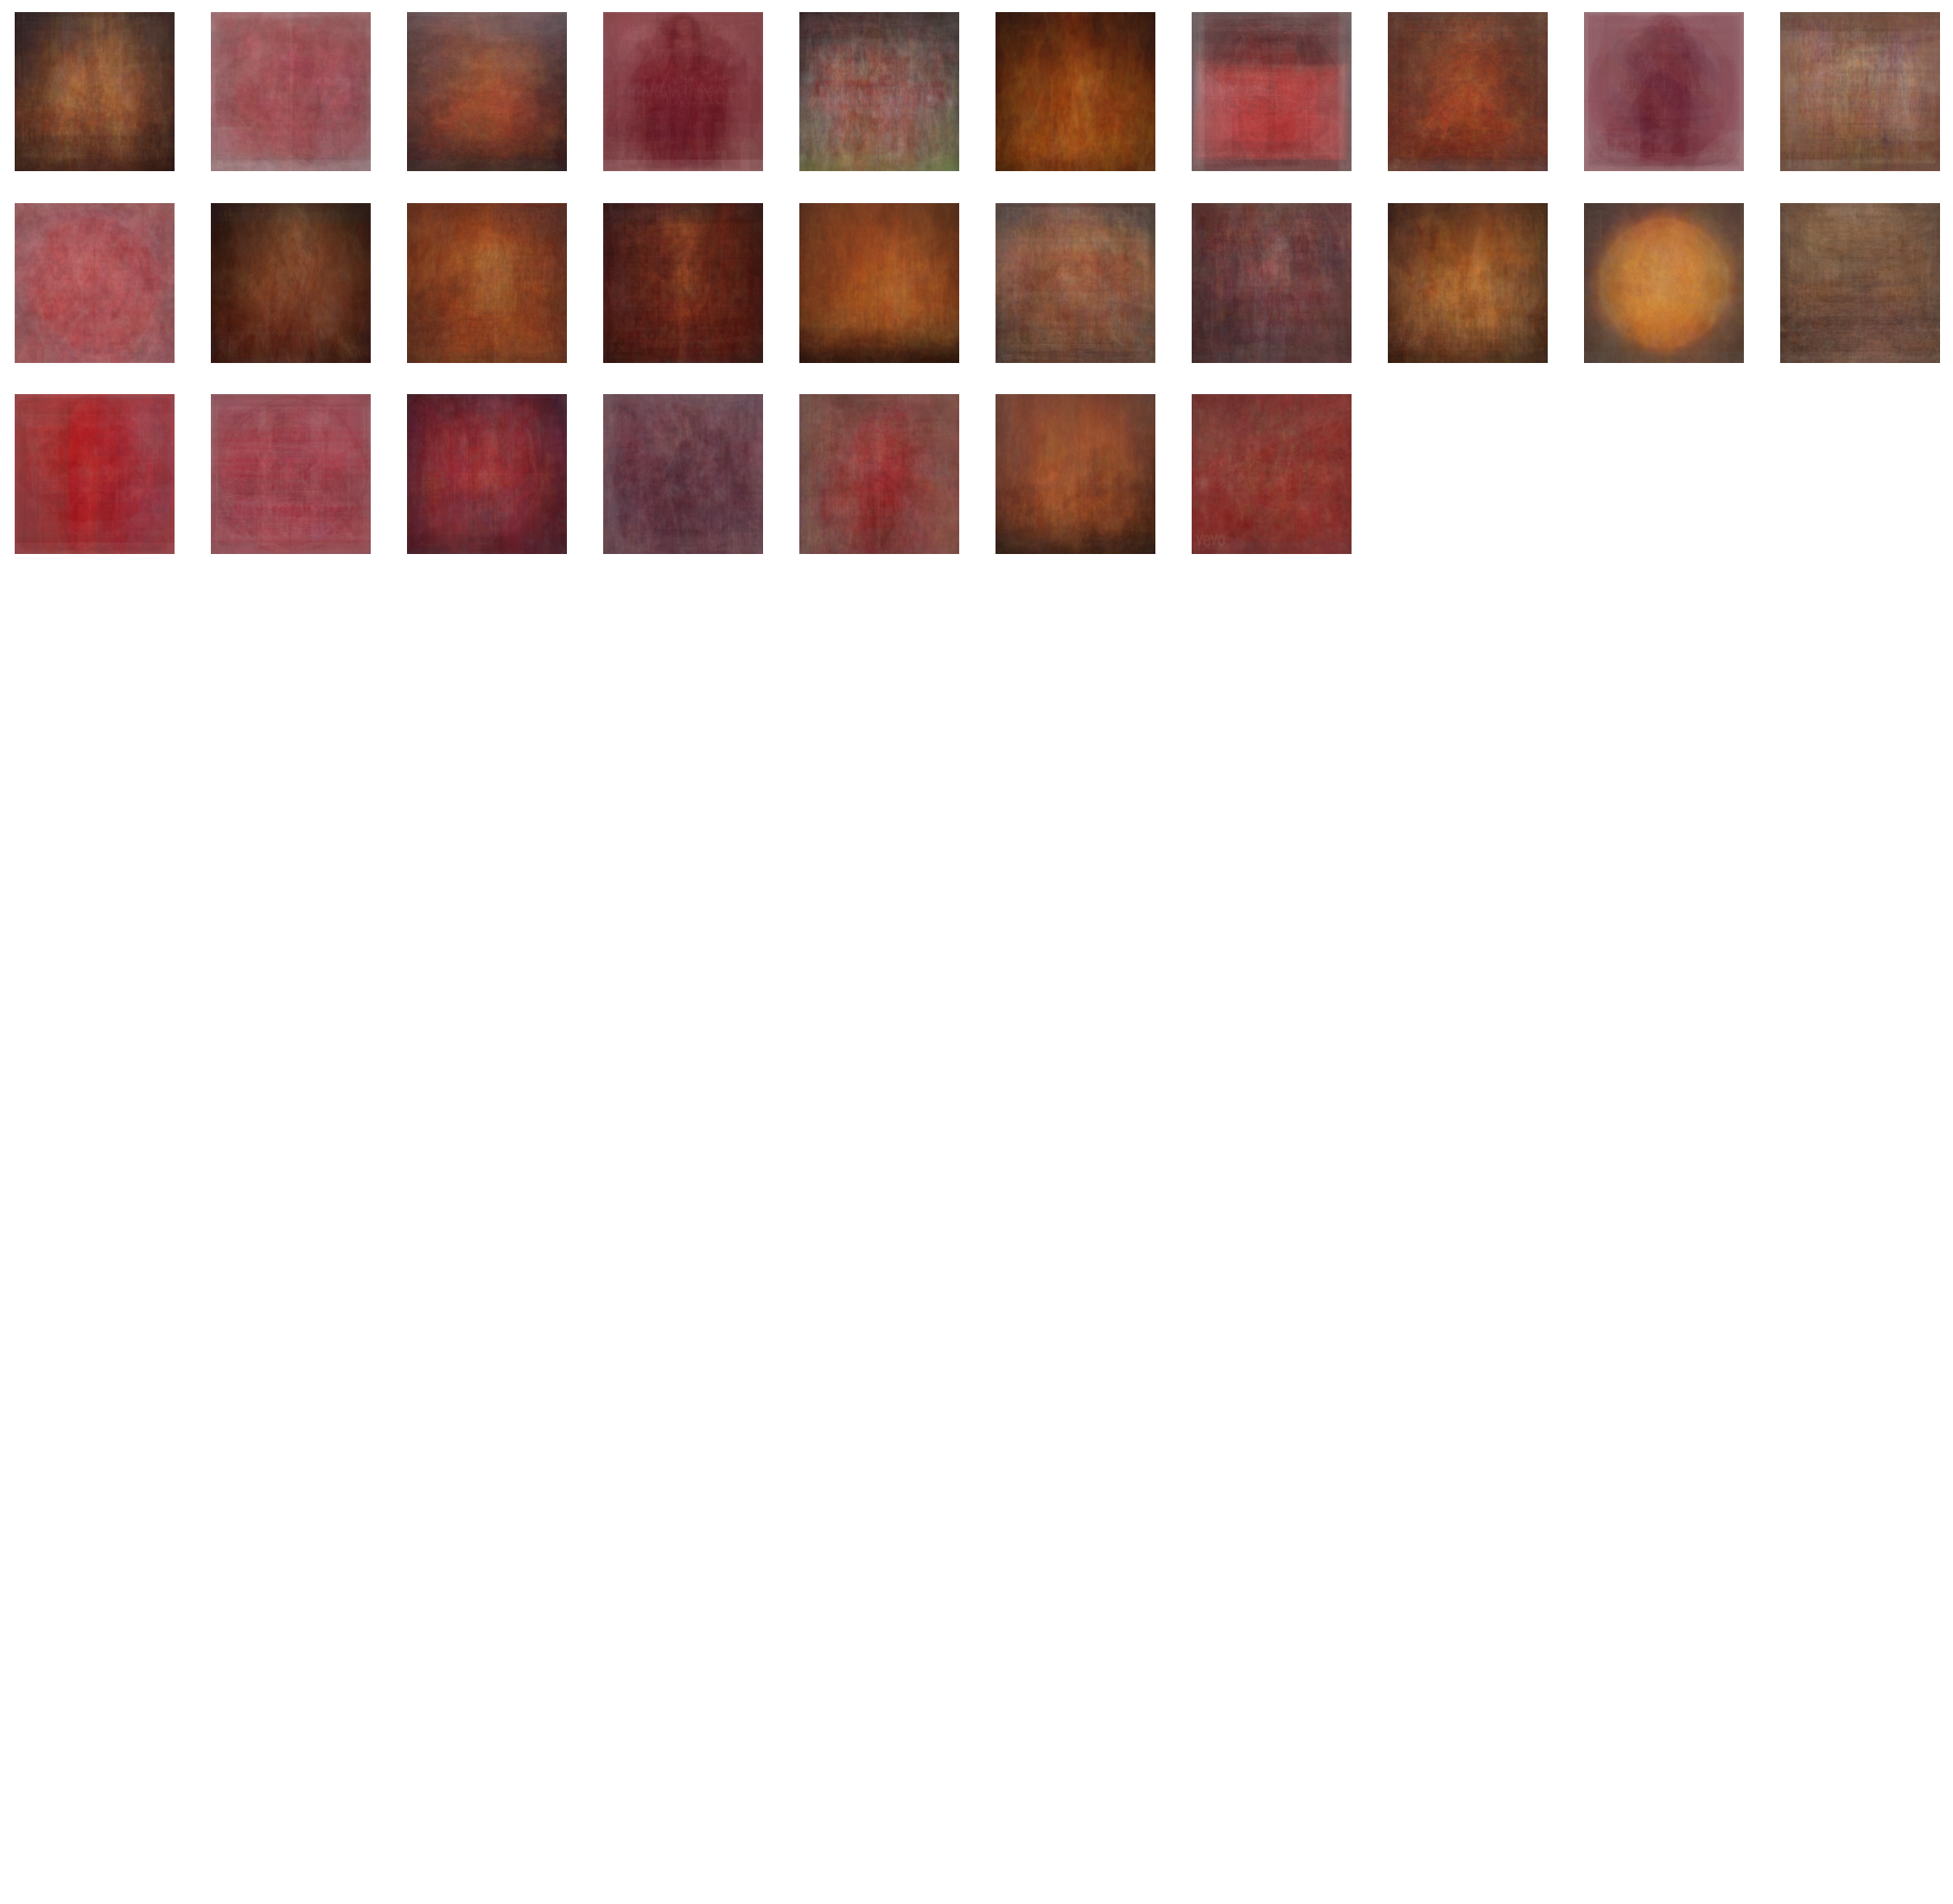

In [13]:
plt.figure(figsize=(20,20))

folder = (np.array(list(coherence['JzAzBz_wavelet'].keys())))[np.argmin(coherence['JzAzBz_wavelet'])]

k=0
for i in range(10):
    for j in range(10):
        plt.subplot2grid((10,10), (i,j))
        try:
            img1_temp = np.array(Image.open('JzAzBz_clustering/{}/{}'.format(folder,
                                                                             image_directory['JzAzBz_wavelet'][folder][k])))
            plt.imshow(img1_temp)
            plt.axis('off')
        except:
            plt.axis('off')
        k+=1
        
plt.show()